In [ ]:
#drive 연동
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/jaso-me-back/training'

In [ ]:
!pip install torch
!pip install transformers
!pip install fastai==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 26.4 MB/s 
     |████████████████████████████████| 6.6 MB 56.1 MB/s 
     |████████████████████████████████| 596 kB 71.9 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 187 kB 25.2 MB/s 
     |████████████████████████████████| 55 kB 5.0 MB/s 
     |████████████████████████████████| 831.4 MB 7.1 kB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |█████████████████████████████

In [ ]:
!pip install fastcore fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 6.8 MB/s 
     |████████████████████████████████| 197 kB 62.9 MB/s 
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.3.29
    Uninstalling fastcore-1.3.29:
      Successfully uninstalled fastcore-1.3.29
  Attempting uninstall: fastai
    Found existing installation: fastai 2.4
    Uninstalling fastai-2.4:
      Successfully uninstalled fastai-2.4


In [ ]:
from typing import Optional
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re

In [ ]:
#download model and tokenizer
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

#test tokenizer
print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

#test model ouput
text = """위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 """
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)

Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:925: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']
위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 ᄋ씨(33)에 대해 구속영장을 신청했다.
경찰에 따르면 ᄀ씨는 지난달 29일 오후 9시30분쯤 서울 강남구 논현동 자신의 집에서 ᄂ씨를 흉기로 찔러 숨지게 한 혐의를 받고 있다.
ᄀ씨의 범행은 B씨가 “여자친구가 있다”며 경찰에 신고하면서 드러났다.
B씨도 같은 날 오전 10시경 경찰서에 자진출석해 조사를 받았다.
ᄂ씨와 함께 있던 ᄃ(31·여)은 이날 새벽 1시까지 조사에서 “내가 여자 친구와 사귀고 있어 괴롭다”고 진술했다.</d> 부산시는 오는 10월까지 '부산형


In [ ]:
with open('./output_data.txt') as f:
    lines = f.read()
lines = " ".join(lines.split())
print(lines[0:100])
len(lines)

저는 학부 연구생을 하면서 연구실 홈페이지 개발 및 관리를 맡은 경험이 있습니다. 당시 처음으로 웹 백엔드를 접하게 되었고 스프링 부트로 연구실 홈페이지를 개발했고 이를 바탕으로 


2802764

In [ ]:
#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)
# dls.show_batch(max_n=2)

SuggestedLRs(valley=3.0199516913853586e-05)


epoch,train_loss,valid_loss,perplexity,time
0,3.759642,3.811064,45.198517,02:48
1,3.345315,3.744753,42.298542,02:53
2,3.020573,3.708013,40.772705,02:56
3,2.804164,3.695959,40.284191,02:54
4,2.705518,3.684304,39.817383,02:54


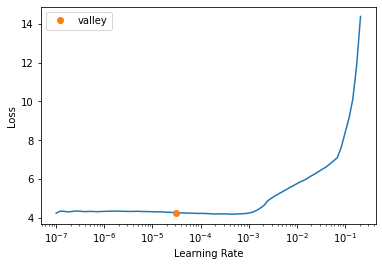

In [ ]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(5, lr)
# learn.fine_tune(3)

In [ ]:
prompt="위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 "
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'위치추적 전자장치(전자발찌) 훼손 전후로 여성 2명을 잇달아 살해한 ’강간치상‘ 사건은 저에게 큰 충격을 주었습니다. 이 사건을 계기로 ‘범죄와의 전쟁’을 선포하고 범죄로부터 자신을 보호하기 위해 노력했습니다 하지만 이러한 노력은 오히려 피해자에게 상처를 주는 결과를 낳았었기에 더욱더 계획적이고 지속적인 노력이 필요하다고 생각합니다., 제가 가장 중요하게 생각하는 것은 ‘자신이 맡은 바 임무에 대한 책임감’이라고 생각해왔기 때문입니다, 그래서 항상 주어진 일에 최선을 다하며, 책임을 지는 자세를 가지고 있습니다. 또한, 어떠한 일이든 끝까지 해내는 끈기를 갖고 있기 때문에 주위 사람들에게도 인정받는 인재가 되고'

In [ ]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  bos_token='</s>', eos_token='</s>', unk_token='<unk>',
  pad_token='<pad>', mask_token='<mask>') 
pretrained_model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:925: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


제가 가장 중요하다고 생각하는 것은 뭘까요?"
"그건 그렇고요. 그게 바로 우리를 위한 길입니다. 우리가 원하는 건, 이 길을 가는 것뿐입니다! 그리고 우리는 지금부터라도 우리의 삶을 바꿀 수 있는 방법을 찾아야 합니다. 그러기 위해서는 먼저 당신이 해야 할 일이 무엇인지 생각해 보십시오. 우선 당신의 삶에서 필요한 것이 무엇인지를 찾아보세요, 아니면 그것을 어떻게 실천할 것인지를 생각하십시다. 그것이야말로 진정한 삶의 방법이라고 믿습니다. 그래서 저는 오늘도 열심히 일하고 있습니다. 하지만 아직은 시간이 많이 남아 있습니다, 제발 부탁드립니다. 이제부터는 정말 중요한 일을 하셔야


In [ ]:
text = "대학교 공부를 하며 배운 점은 실무와"
input_ids = tokenizer.encode(text)
gen_ids = pretrained_model.generate(torch.tensor([input_ids]),
                           max_length=128,
                           repetition_penalty=2.0,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           use_cache=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
generated = re.sub(r"(\.\ )",".\n",generated)
print(generated)

대학교 공부를 하며 배운 점은 실무와 관련된 문제들이 많이 출제된다는 점이다.
이런 문제를 해결하기 위해선 먼저 자신의 생각을 논리적으로 표현하는 능력을 길러야 한다.
또한 자신이 생각하는 바를 정확하게 표현해야 하며, 이를 통해 논리적 사고력을 기를 수 있다.
특히, 평소에는 생각의 흐름을 잘 파악해 자신만의 논리를 만들어 나가는 것이 중요하다.
이를 위해서는 우선 자기만의 논리로 자신을 설득하는 훈련을 해야 하고, 그 과정에서 자신감을 가질 필요가 있다.</d> 지난달 30일 오후 서울 종로구 세종로 정부중앙청사 별관.
이낙연 국무총리가 주재하고 있는 국무회의에서는 ‘최순실 게이트’ 관련 긴급 현안보고가 이뤄졌다.
국무


In [ ]:
prompt="대학교 공부를 하며 배운 점은 실무와"
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
generated = tokenizer.decode(preds[0].cpu().numpy())
generated = re.sub(r"\.",".\n",generated)
print(generated)

대학교 공부를 하며 배운 점은 실무와 관련된 지식입니다.
 저는 IT 직무에 대한 관심과 열정을 가지고 있습니다.
, 제가 가장 중요하게 생각하는 것은 ‘사람’입니다 대학 시절 컴퓨터공학부에 진학하여 프로그래밍과 데이터베이스 과목을 수강하였습니다.
 학부 수업으로는 C언어와 JAVA를 배웠고 교수님께서는 이를 바탕으로 프로젝트를 진행하시며 전공 지식을 쌓았습니다, 그리고 대학원에서는 자바 언어를 이용하여 모바일 앱을 개발하셨으며 현재는 안드로이드 어플리케이션 개발을 하고 계십니다.
이러한 경험들은 입사 후 빠른 조직 융화 및 시너지를 낼 수 있다고 생각합니다.
.
저는 어렸을 때부터 가족과 함께하는 삶을


In [ ]:
learn.model.save_pretrained("./models/temptrained_backup")
# model.push_to_hub("temptrained")
# tokenizer.push_to_hub("temptrained")